#             Case Study on Testing of Hypothesis

 ####  A company started to invest in digital marketing as a new way of their product promotions. For that they collected data and  decided to carry out a study on it.
   ####  1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
   ####  2. The company needs to check whether there is any dependency between the features Region and Manager.
   ####   Help the company to carry out their study with the help of data provided.

#### *Data preparation*

In [2]:
import pandas as pd
import numpy as np                                       # importing necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats

In [3]:
sales = pd.read_csv('Sales_add.csv')                    # reading dataset in python environment.
sales

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [4]:
sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
sales.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [6]:
sales.isnull().sum()                             # checking null values.

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

#### Findings:
    
    • The given dataset is about a company's sales amount before and after it switch to digital marketing. Sales per month 
    from each region is given in the dataset.
    
    • The dataset contains 22 observations(22 months) and a total of 5 features.
    
    • The dataset include 3 objects and 2 int(64) datatypes.
    
    • from the statistical data we can see that their is considerable change in  sales after switching to digital marketing.
    
    • There are no null values in this data.
    

### 1. Check whether there is any increase in sales after stepping into digital marketing.

In [14]:
sales[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()   # bringing statistical data

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


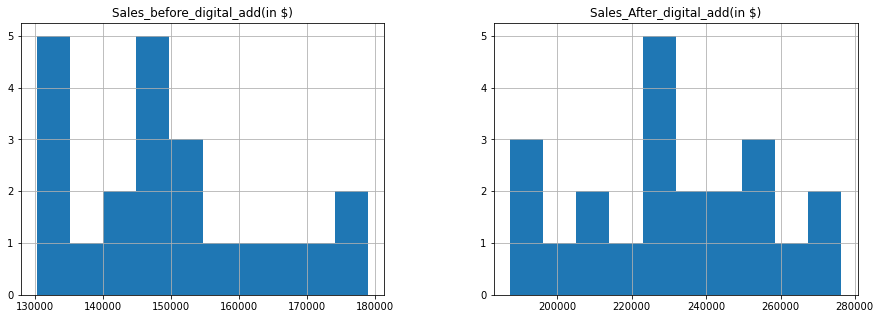

In [26]:
freqgraph = sales.select_dtypes(include=['int64'])  # selecting variables to plot.
freqgraph.hist(figsize=(15,5))                              # plotting histographs
plt.show()

#### Findings:
    
    • The statistical data and histograph shows increase in sales after digital marketing.
    • Sales before digital marketing ranges between 130000 to 180000 (with most sales of 130000 to 150000) 
    • Whereas, sales after digital ranges between 130000 to 280000 (with a maximum sale between 220000 and 230000 dollars).
    we can do hypothesis testing to validate our findings.

#### Hypothesis testing:
stating hypothesis:
#### • Null hypothesis(H0): Sales before and after switching to digital marketing are same.
#### • Alternate hypothesis(Ha): Sales before and after digital marketing are different.
• We are taking significance level = 0.05. we can do t-test to determine p-value and then comparing with significance value.

• If the p-value<0.05, we can reject the Null hypothesis and accept the Alternate hypothesis.

• If the p-value>0.05 we can accept the Null hypothesis and reject the Alternate hypothesis.

In [27]:
# Determining p-values by t-test
ttest,pval = stats.ttest_rel(sales['Sales_before_digital_add(in $)'], sales['Sales_After_digital_add(in $)'])
print(pval)

6.336667004575778e-11


In [28]:
round(pval)     # rounded p-value 

0

In [29]:
#comparing p-value with significance level 0.05
if pval < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


#### Findings:
    
   •Since __p-value<0.05__, we can reject null hypothesis.
    
   •We can infer that sales after switching to digital marketing has increased and 
      Digital marketing has significant influence on rise in sales.

###  2. check whether there is any dependency between the features “Region” and “Manager”.

### Hypothesis testing

Stating hypothesis:

#### • H0 (Null Hypothesis) = The 2 features (region and manager) are independent.

#### • Ha (Alternate Hypothesis) = The 2 features (region and manager) are dependent.
     
•significance level is taken as 0.05.If the p-value<0.05, we can reject the Null hypothesis and accept the Alternate hypothesis.

• If the p-value>0.05 we can accept the Null hypothesis and reject the Alternate hypothesis.
        
•we are checking chi-squared independence between two features.
A Contingency table (crosstab) can be used to summarise the relationship between categorical variables.


In [30]:
from scipy.stats import chi2_contingency

In [31]:
scipy.stats.chi2.ppf(1-0.05, 4)          #critical chi-square value.

9.487729036781154

In [32]:
crosstab = pd.crosstab(sales['Region'], sales['Manager'])
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [33]:
stats.chi2_contingency(crosstab)         #chi-square value.

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

#### Findings:
    
• The first value __(3.05056..)__ is the Chi-square value, followed by the __p-value (0.549399..)__, then comes the degrees of freedom
  (4), and lastly it outputs the expected frequencies as an array.

• chi-square critical value = __9.487729036781154__

• chi-square critical value > chi-square value ,  __p- value > 0.05__,means we have to reject alternate hypothesis(2 features are dependent).

• Both the values have large variation.
  we cannot reject null hypothesis. Both(Region and Manager) are independent features.

   ###### ............................................................................................. THANK YOU .............................................................................................................